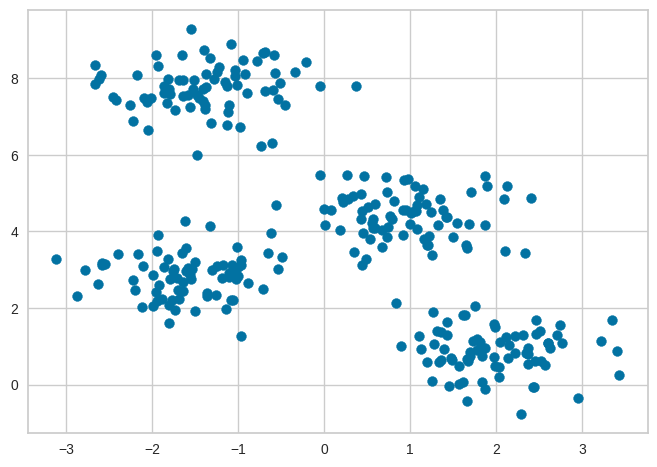

In [9]:
from random import shuffle
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import warnings
warnings.filterwarnings("ignore") #ignores all warnings


X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

# Create a plot that shows best k
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

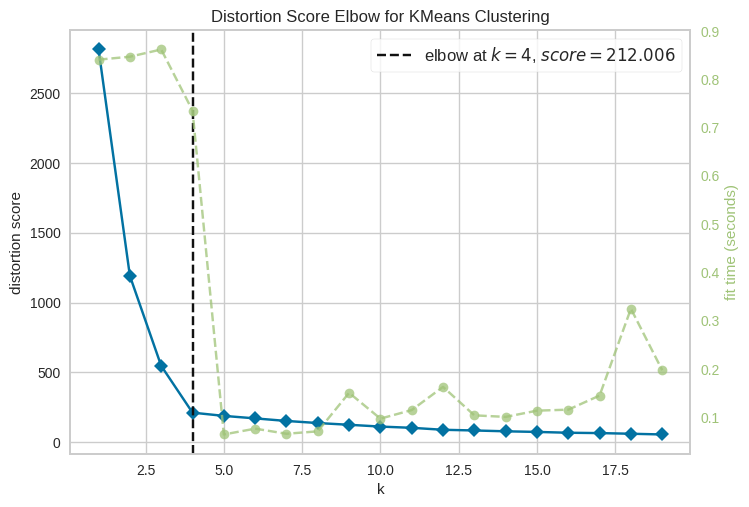

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Find best K value for the data
visualizer = KElbowVisualizer(KMeans(), k=(1, 20))
visualizer.fit(X)
visualizer.show()

In [11]:
# Use the best K value to cluster the data
best_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=best_k)
y_pred = kmeans.fit_predict(X)

predictions = np.zeros_like(y_pred)
for i in range(best_k):
    mask = (y_pred == i)
    predictions[mask] = mode(y_true[mask], keepdims = False)[0]

Accuracy Score: 100.0%


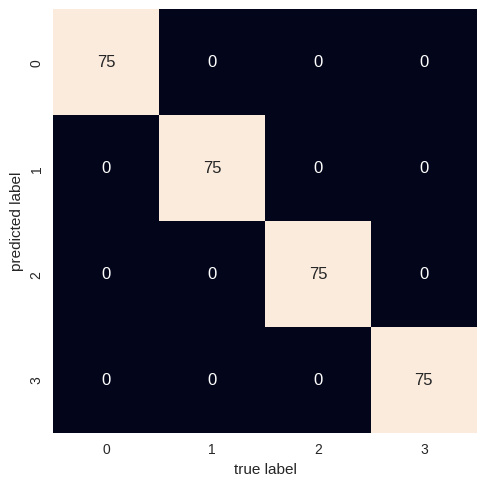

In [12]:
#Accuracy Score
score = accuracy_score(y_true, predictions)
print('Accuracy Score: ' + repr(score*100) + '%')

# Confusion Matrix
mat = confusion_matrix(y_true, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()